In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [3]:
tech_list = ['HDB']   #, 'RELIANCE.NS', 'TCS.NS', 'SBIN.NS']
end = datetime.now()
start = "2006-12-29"
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

stk_list = [HDB]
com_name = ["HDFC"]

for comp, c_name in zip(stk_list, com_name):
    comp["company_name"] = c_name

df = pd.concat(stk_list, axis=0)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2006-12-29,7.650,7.656,7.511,7.548,6.753229,1686000,HDFC
2007-01-03,7.700,7.704,7.456,7.493,6.704020,2278000,HDFC
2007-01-04,7.490,7.534,7.389,7.479,6.691494,2269000,HDFC
2007-01-05,7.500,7.500,7.273,7.321,6.550131,1718000,HDFC
2007-01-08,7.272,7.353,7.203,7.260,6.495554,2070000,HDFC


In [17]:
# Assuming 'data' is your DataFrame and 'Date' and 'Close' are the columns
df_prophet = pd.DataFrame()
df_prophet['y'] = df['Close']

In [18]:
df['Close']

Date
2006-12-29     7.548000
2007-01-03     7.493000
2007-01-04     7.479000
2007-01-05     7.321000
2007-01-08     7.260000
                ...    
2023-11-27    58.889999
2023-11-28    59.349998
2023-11-29    60.549999
2023-11-30    60.040001
2023-12-01    60.709999
Name: Close, Length: 4260, dtype: float64

In [22]:
df_prophet = df_prophet.reset_index()

In [25]:
df_prophet.rename(columns = {'Date':'ds'}, inplace = True)

In [26]:
df_prophet.head()

,ds,y
0,2006-12-29,7.548
1,2007-01-03,7.493
2,2007-01-04,7.479
3,2007-01-05,7.321
4,2007-01-08,7.260


In [35]:
total = len(df_prophet)
total
train_length = int(0.95*total)
train_length

4047

In [36]:
train = df_prophet[0:train_length]
train.shape

(4047, 2)

In [38]:
train.tail()

,ds,y
4042,2023-01-23,70.750000
4043,2023-01-24,71.440002
4044,2023-01-25,66.930000
4045,2023-01-26,68.010002
4046,2023-01-27,65.769997


In [27]:
from prophet import Prophet

# Initialize the Model
m = Prophet()

# Fit the Model
m.fit(df_prophet)

10:31:10 - cmdstanpy - INFO - Chain [1] start processing
10:31:11 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
# For forecasting the next 365 days
future = m.make_future_dataframe(periods=0)

In [43]:
forecast = m.predict(future)

In [44]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-29,8.404815,2.715024,16.394886,8.404815,8.404815,0.920872,0.920872,0.920872,0.190733,0.190733,0.190733,0.730138,0.730138,0.730138,0.0,0.0,0.0,9.325687
1,2007-01-03,8.408061,3.067234,17.129091,8.408061,8.408061,1.084239,1.084239,1.084239,0.189869,0.189869,0.189869,0.894369,0.894369,0.894369,0.0,0.0,0.0,9.492300
2,2007-01-04,8.408710,3.573909,16.276437,8.408710,8.408710,1.102755,1.102755,1.102755,0.179128,0.179128,0.179128,0.923627,0.923627,0.923627,0.0,0.0,0.0,9.511465
3,2007-01-05,8.409359,3.032798,16.179822,8.409359,8.409359,1.140877,1.140877,1.140877,0.190733,0.190733,0.190733,0.950144,0.950144,0.950144,0.0,0.0,0.0,9.550237
4,2007-01-08,8.411307,3.186398,16.114689,8.411307,8.411307,1.157066,1.157066,1.157066,0.148809,0.148809,0.148809,1.008257,1.008257,1.008257,0.0,0.0,0.0,9.568373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,2023-11-27,67.306079,61.883037,74.612059,67.306079,67.306079,0.788881,0.788881,0.788881,0.148809,0.148809,0.148809,0.640072,0.640072,0.640072,0.0,0.0,0.0,68.094960
4256,2023-11-28,67.311610,61.627338,74.699653,67.311610,67.311610,0.836341,0.836341,0.836341,0.163521,0.163521,0.163521,0.672820,0.672820,0.672820,0.0,0.0,0.0,68.147951
4257,2023-11-29,67.317141,61.850092,75.205537,67.317141,67.317141,0.891411,0.891411,0.891411,0.189869,0.189869,0.189869,0.701541,0.701541,0.701541,0.0,0.0,0.0,68.208552
4258,2023-11-30,67.322672,62.169636,74.963979,67.322672,67.322672,0.904966,0.904966,0.904966,0.179128,0.179128,0.179128,0.725839,0.725839,0.725839,0.0,0.0,0.0,68.227639


In [45]:
valid = pd.DataFrame()
valid["actual"] = df_prophet["y"]
valid["pred"] = forecast["yhat"]

In [54]:
valid.index = df.index

In [55]:
valid

,actual,pred
Date,,
2006-12-29,7.548000,9.325687
2007-01-03,7.493000,9.492300
2007-01-04,7.479000,9.511465
2007-01-05,7.321000,9.550237
2007-01-08,7.260000,9.568373
...,...,...
2023-11-27,58.889999,68.094960
2023-11-28,59.349998,68.147951
2023-11-29,60.549999,68.208552


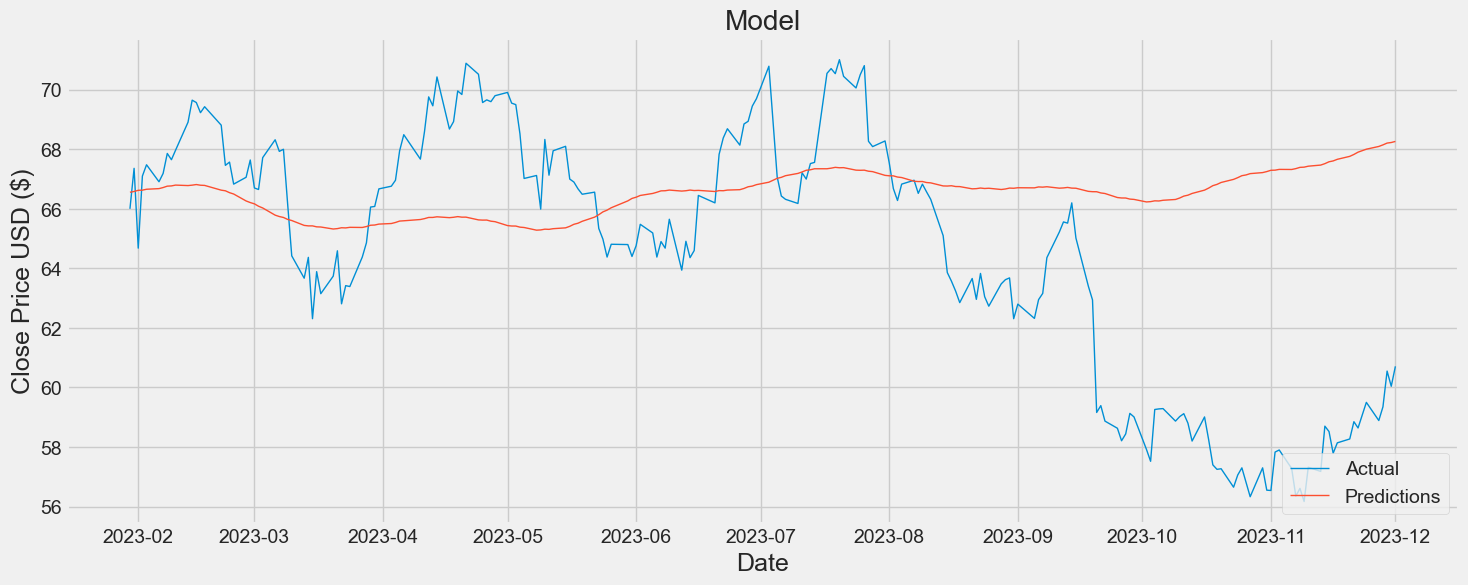

In [56]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'], linewidth="1")
plt.plot(valid[['actual', 'pred']][train_length: ], linewidth="1")
plt.legend(['Actual','Predictions'], loc='lower right')
plt.show()

In [57]:
(np.sum((valid["pred"][train_length:] - valid["actual"][train_length:])**2))/len(valid[train_length:])

23.89111928788275

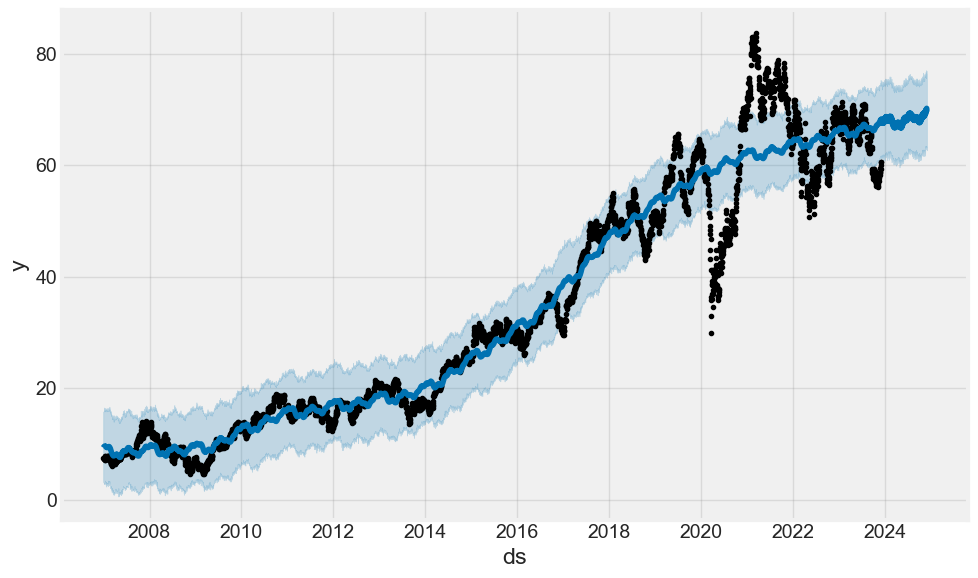

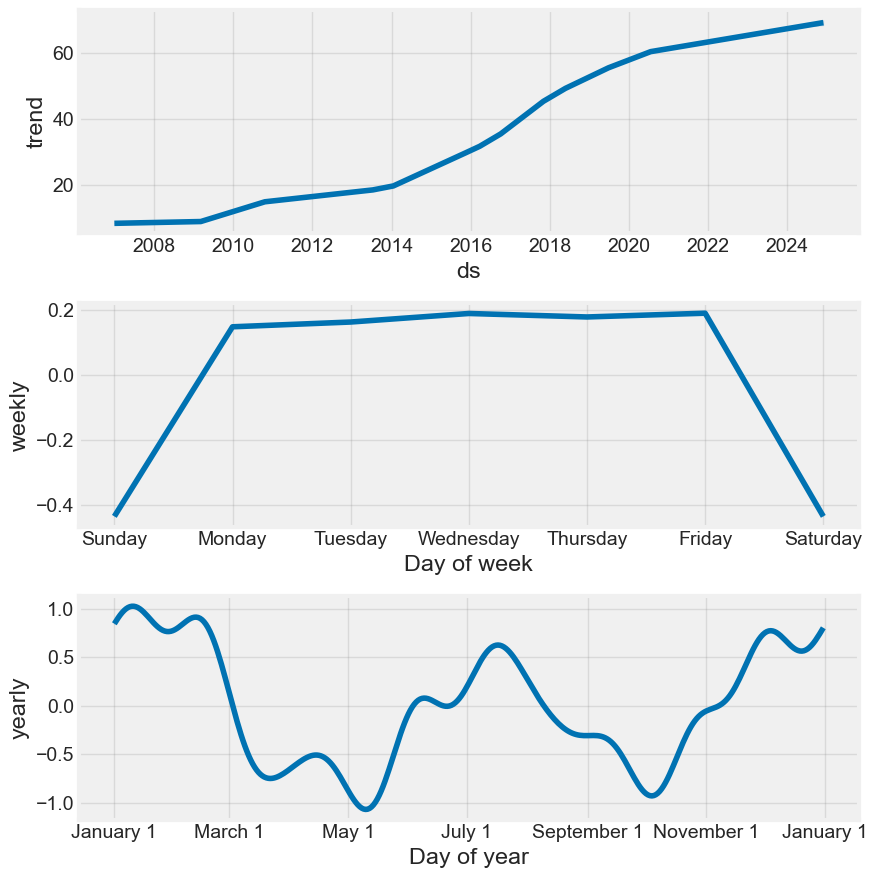

In [30]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)